Lendo Dataframe e imprimindo os possíveis atributos a serem usados no método de aprendizado.

In [2]:
import pandas as pd

dataFrame = pd.read_csv('datasets/movies_amostra.csv')

print('Atributos do DataFrame')
for column in dataFrame.columns:
    print(column)

Atributos do DataFrame
id
titulo
adulto
orcamento
idioma_original
popularidade
data_de_estreia
resumo
receita
duracao
genero
ator_1
ator_2
ator_3
ator_4
ator_5
dirigido_por
escrito_por_1
escrito_por_2
historia_original


Primeiramente estamos tentando definir quais parâmetros serão os melhores para usarmos para o método de aprendizado de máquina, para isso usamos o método `ganho_informacao`.

Além disso desconsideramos atributos que tenham ganho de informação muito alto, pois estes tratam de características específicas de cada filme, como resumo por exemplo.

In [16]:
from temp.ganho_informacao import ganho_informacao

aux_list = []
for column in dataFrame.columns:
    aux_dict = {}
    aux_dict[column] = ganho_informacao(dataFrame,'genero',column)
    aux_list.append(aux_dict)

infogain_df = pd.DataFrame(columns=('Atributo','InfoGain'))
for i in range(len(dataFrame.columns)):
    if list(aux_list[i].keys())[0] != 'genero':
        infogain_df.loc[i] = [list(aux_list[i].keys())[0], list(aux_list[i].values())[0]]
        
infogain_df.sort_values(by='InfoGain',inplace=True,ascending=False)

infogain_df

,Atributo,InfoGain
0,id,0.922244
1,titulo,0.919326
7,resumo,0.896867
13,ator_3,0.830448
16,dirigido_por,0.821125
14,ator_4,0.818588
12,ator_2,0.811614
6,data_de_estreia,0.804262
11,ator_1,0.799952
15,ator_5,0.785032


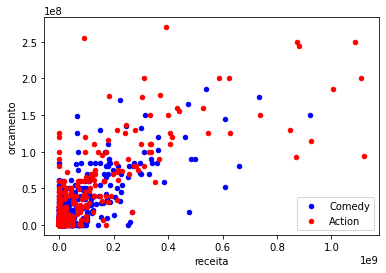

In [21]:
types_of_species = list(dataFrame['genero'].value_counts().keys())


plot1 = dataFrame[dataFrame['genero'] == types_of_species[0]].plot.scatter(x='receita',y='orcamento', color='Blue', label=types_of_species[0])

plot2 = dataFrame[dataFrame['genero'] == types_of_species[1]].plot.scatter(x='receita',y='orcamento', color='Red', label=types_of_species[1], ax=plot1)

In [17]:
dataFrame['genero'].value_counts()

Comedy    1988
Action    1012
Name: genero, dtype: int64

In [11]:
from temp.ganho_informacao import ganho_informacao_condicional

#ganho_informacao_condicional(dataFrame, None, 'genero', 'escrito_por_1', 'John Waters')

dataFrame[dataFrame.ator_1.isin(['Jackie Chan'])]

,id,titulo,adulto,orcamento,idioma_original,popularidade,data_de_estreia,resumo,receita,duracao,genero,ator_1,ator_2,ator_3,ator_4,ator_5,dirigido_por,escrito_por_1,escrito_por_2,historia_original
48,21521,Project A II,False,0,cn,12.0,1987-08-19,Dragon is now transferred to be the police hea...,0.0,101.0,Comedy,Jackie Chan,Maggie Cheung,Michael Chan Wai-Man,Rosamund Kwan,Bill Tung,Jackie Chan,NaN,NaN,NaN
398,38425,Fantasy Mission Force,False,0,zh,2.0,1983-02-13,"Similar to ""The Dirty Dozen"" or one of that na...",0.0,90.0,Comedy,Jackie Chan,Brigitte Lin,Adam Cheng,Jimmy Wang Yu,Hsu Pu-Liao,Chu Yen-ping,Hsin Wei,NaN,NaN
573,300168,Dragon Blade,False,65000000,zh,9.0,2015-02-19,"Huo An, the commander of the Protection Squad ...",121545703.0,127.0,Action,Jackie Chan,John Cusack,Adrien Brody,Sharni Vinson,Benny Urquidez,Daniel Lee,NaN,NaN,NaN
794,10622,Mr. Nice Guy,False,12716953,cn,11.0,1997-01-31,A Chinese chef accidentally gets involved with...,18814720.0,113.0,Comedy,Jackie Chan,Richard Norton,Miki Lee,Gabrielle Fitzpatrick,Karen McLymont,Sammo Hung,Fibe Ma,Edward Tang,NaN
837,417321,The Master: A Lego Ninjago Short,False,0,en,1.0,2016-09-22,Master Wu gets into a conflict with Chicken.,0.0,5.0,Comedy,Jackie Chan,Abbi Jacobson,Justin Theroux,NaN,NaN,Jon Saunders,NaN,NaN,NaN
939,21519,Project A,False,0,cn,10.0,1983-12-22,In late 19th Century Hong Kong the British may...,0.0,106.0,Comedy,Jackie Chan,Sammo Hung,Yuen Biao,Dick Wei,Tai Bo,Jackie Chan,NaN,NaN,NaN
1404,10771,The Tuxedo,False,0,en,11.0,2002-09-27,Cabbie-turned-chauffeur Jimmy Tong learns ther...,0.0,98.0,Comedy,Jackie Chan,Jennifer Love Hewitt,Jason Isaacs,Debi Mazar,Ritchie Coster,Kevin Donovan,Michael J. Wilson,Michael J. Leeson,NaN
1652,21733,Dragons Forever,False,0,cn,7.0,1988-02-11,Jackie Chan stars as a hot-shot lawyer hired b...,0.0,102.0,Comedy,Jackie Chan,Sammo Hung,Yuen Biao,Pauline Yeung,Deannie Yip,Sammo Hung,NaN,NaN,NaN
1687,219572,Police Story 2013,False,0,cn,21.0,2013-12-24,A man looking for the release of a long-time p...,81170000.0,108.0,Action,Jackie Chan,Liu Ye,Jing Tian,Yu Rong-Guang,Guli Nazha,Ding Sheng,NaN,NaN,NaN
1834,18760,Spiritual Kung Fu,False,0,cn,2.0,1978-11-23,Jackie Chan plays the part of the class clown ...,0.0,94.0,Action,Jackie Chan,James Tien,Mo Man-Sau,Li Tong-Chun,Lee Kwan,Lo Wei,NaN,NaN,NaN
